In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('US_Accidents_Dec21_updated.csv')

In [3]:
data = data.drop(columns = ['Number','Zipcode','Airport_Code','Country','Wind_Chill(F)', 'Wind_Direction', 
                    'Amenity','Civil_Twilight', 'Nautical_Twilight','Astronomical_Twilight'])
data['Start_Time']=pd.to_datetime(data['Start_Time'])
data['End_Time']=pd.to_datetime(data['End_Time'])
data.insert(4,"time diff",(data['End_Time']-data["Start_Time"]).dt.total_seconds())
data.insert(3,"Year",pd.DatetimeIndex(data["Start_Time"]).year)
data.insert(4,"Month",pd.DatetimeIndex(data["Start_Time"]).month)
data.insert(5,"Day",pd.DatetimeIndex(data["Start_Time"]).day)

data.loc[:,"Bump":"Turning_Loop"]=data.loc[:,"Bump":"Turning_Loop"].astype(int)
#create dummies for sunrise_sunset
data['Sunrise_Sunset'] = data['Sunrise_Sunset'].map({'Night':int(0), 'Day':int(1)})
df = data.dropna()

df_cleaned = df.drop(columns = ['ID','Start_Time', 'Year','Month','Day',
                            'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng','Description',
                           'Street','Side','City','County','State','Timezone','time diff', 'Weather_Timestamp',
                            'Weather_Condition','Turning_Loop'])
df_cleaned


,Severity,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset
0,3,3.230,42.1,58.0,29.76,10.0,10.4,0.00,0,0,0,0,0,0,0,0,0,0,0,0.0
4,3,0.500,37.0,93.0,29.69,10.0,10.4,0.01,0,0,0,0,0,0,0,0,0,0,0,1.0
7,2,0.521,33.1,92.0,29.63,0.5,3.5,0.08,0,0,0,1,0,0,0,0,0,0,0,1.0
9,2,0.826,32.0,100.0,29.59,0.5,3.5,0.05,0,0,0,0,0,0,0,0,0,0,0,1.0
10,2,0.307,33.8,100.0,29.66,3.0,4.6,0.03,0,0,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,2,0.543,86.0,40.0,28.92,10.0,13.0,0.00,0,0,0,0,0,0,0,0,0,0,0,1.0
2845338,2,0.338,70.0,73.0,29.39,10.0,6.0,0.00,0,0,0,0,0,0,0,0,0,0,0,1.0
2845339,2,0.561,73.0,64.0,29.74,10.0,10.0,0.00,0,0,0,1,0,0,0,0,0,0,0,1.0
2845340,2,0.772,71.0,81.0,29.62,10.0,8.0,0.00,0,0,0,0,0,0,0,0,0,0,0,1.0


In [4]:
# Number of accidents of Severity 1,2,3,4
severity_1 = df_cleaned[df_cleaned['Severity'] == 1]
severity_2 = df_cleaned[df_cleaned['Severity'] == 2]
severity_3 = df_cleaned[df_cleaned['Severity'] == 3]
severity_4 = df_cleaned[df_cleaned['Severity'] == 4]
print(len(severity_1),len(severity_2),len(severity_3),len(severity_4))

23556 2080349 71130 65895


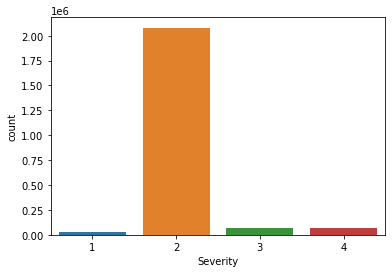

In [5]:
sns.countplot(x = 'Severity', data = df_cleaned)
plt.show()

In [6]:
# We detect the problem of imbalanced data, and there are different methods to deal with it

In [7]:
# Method 1 : Resampling (Undersampling)
# Use Stratified sampling by sampling 23556 observations of each severity category
# The reason we use undersampling instead of oversampling is that to skip the hearvy workload of analysing 8 million observations

In [8]:
severity_1_sample = severity_1
severity_2_sample = severity_2.sample(n=23556,replace=False,random_state = 2)
severity_3_sample = severity_3.sample(n=23556,replace=False,random_state = 2)
severity_4_sample = severity_4.sample(n=23556,replace=False,random_state = 2)

In [9]:
data_sample_1 = pd.concat([severity_1_sample,severity_2_sample,severity_3_sample,severity_4_sample])

In [10]:
data_sample_1 

,Severity,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset
1735388,1,0.000,103.0,22.0,27.15,10.0,10.0,0.00,0,1,1,0,0,0,0,0,1,0,1,1.0
1736991,1,0.000,95.0,19.0,27.16,10.0,10.0,0.00,0,1,0,0,0,0,0,0,0,0,1,1.0
1749719,1,0.000,68.0,93.0,29.14,9.0,5.0,0.02,0,0,0,0,0,0,0,0,0,0,0,1.0
1751859,1,0.000,98.0,18.0,28.28,10.0,5.0,0.00,0,1,0,0,0,0,0,0,0,0,1,1.0
1753408,1,0.000,95.0,22.0,29.90,10.0,9.0,0.00,0,0,0,1,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2317232,4,1.341,39.0,67.0,29.60,10.0,8.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0.0
2554408,4,0.262,34.0,100.0,30.12,3.0,23.0,0.18,0,0,0,0,0,0,0,0,0,0,0,0.0
876516,4,0.158,59.0,30.0,29.79,10.0,6.0,0.00,0,0,0,0,0,0,0,0,0,0,0,1.0
2278179,4,0.155,41.0,93.0,29.77,1.0,25.0,0.01,0,0,0,0,0,0,0,1,0,0,1,1.0


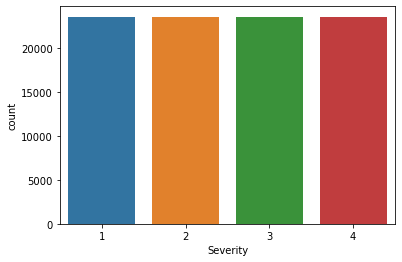

1    23556
2    23556
3    23556
4    23556
Name: Severity, dtype: int64

In [11]:
# Histogram of the new sampled data
sns.countplot(x = 'Severity', data = data_sample_1)
plt.show()

In [12]:
data_sample_1['Severity'].value_counts()

1    23556
2    23556
3    23556
4    23556
Name: Severity, dtype: int64

In [17]:
# Method 2: Resampling (Oversampling)

In [16]:
from sklearn.utils import resample
severity_1_upsample = resample(severity_1_sample, 
                                 replace=True,    # sample with replacement
                                 n_samples= 2080349, # to match majority class 'Severity' 2
                                 random_state=100) 
severity_2_upsample = resample(severity_2_sample, 
                                 replace=True,    # sample with replacement
                                 n_samples= 2080349, # to match majority class 'Severity' 2
                                 random_state=100) 
severity_3_upsample = resample(severity_3_sample, 
                                 replace=True,    # sample with replacement
                                 n_samples= 2080349, # to match majority class 'Severity' 2
                                 random_state=100) 
severity_4_upsample = resample(severity_4_sample, 
                                 replace=True,    # sample with replacement
                                 n_samples= 2080349, # to match majority class 'Severity' 2
                                 random_state=100) 
data_sample_2 = pd.concat([severity_1_upsample,severity_2_upsample,severity_3_upsample,severity_4_upsample])

In [17]:
data_sample_2['Severity'].value_counts()

1    2080349
2    2080349
3    2080349
4    2080349
Name: Severity, dtype: int64

In [ ]:
# Method 3: Smote
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
data = df_cleaned.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
# Comment: Smote method is taking too long due to the size of the dataset so that we decide to drop it